In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

## Read in Data

In [228]:
# this df includes chem class, smiles, and the image label for the molecular images
images = pd.read_csv("../data/3cls_rmsaltol.csv") 

# this df includes all chemical properties and smiles for the chemicals
chems = pd.read_csv("../data/CID_properties_nr.csv")

## update chemical columns
chems.columns = chems.columns.str.lower()
chems.rename({"desalted_smiles": "smiles"}, inplace = True, axis = 1 )

In [229]:
chems.shape

(6935, 8)

In [230]:
chems["drug_class"].value_counts()

antiinfective          2396
antineoplastic         1174
cns                    1141
cardio                  787
antiinflammatory        372
hematologic             268
gastrointestinal        255
lipidregulating         164
reproductivecontrol     148
dermatologic            108
respiratorysystem       100
urological               22
Name: drug_class, dtype: int64

#### Merge data frames

Merging dataframes together so that I can have a reference of the chemical properties and molecular structure together.

In [231]:
# merge dataframes
df = pd.merge(images, chems)

# now I have duplicate drug class columns, so I will remove one
df.drop(columns = "class", inplace = True)


# remove extra classes
index_names = df[(df["drug_class"] == "dermatologic") | (df["drug_class"] == "antiinfective")].index

df.drop(index_names, axis = 0, inplace = True)

In [232]:
# 3102 rows overlapped
df.shape

(3102, 9)

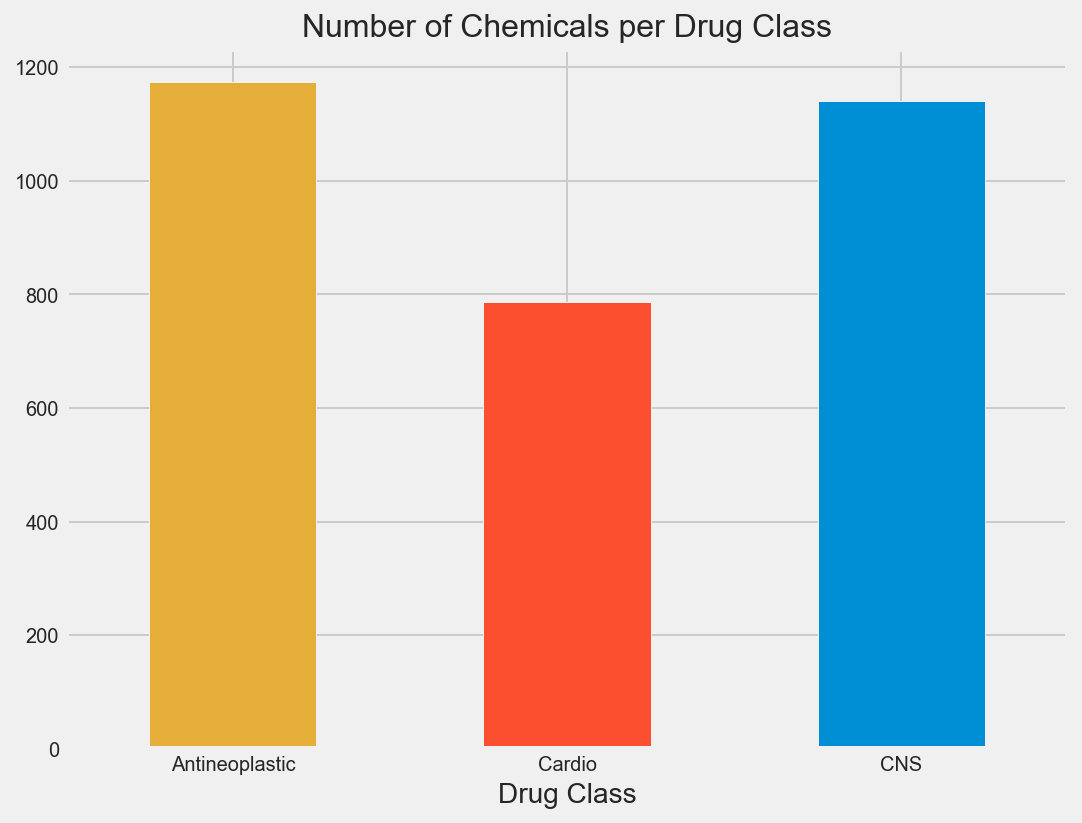

In [234]:
# plot a bar chart for price per square foot by neighborhood
colors = [ "#e5ae38", "#fc4f30", "#008fd5"]
ax = df.groupby("drug_class")["smiles"].count().plot(kind='bar', figsize=(8, 6), fontsize=10, color = colors)
plt.title("Number of Chemicals per Drug Class", fontsize = 16)
plt.xlabel("Drug Class", fontsize = 14)
plt.xticks(np.arange(3), labels =["Antineoplastic", "Cardio", "CNS"], rotation = "horizontal")
plt.ylabel("", fontsize = 12)
plt.savefig('../plots/number_chemicals.png', dpi = 150);

# EDA

Explore the molecular weights by drug class

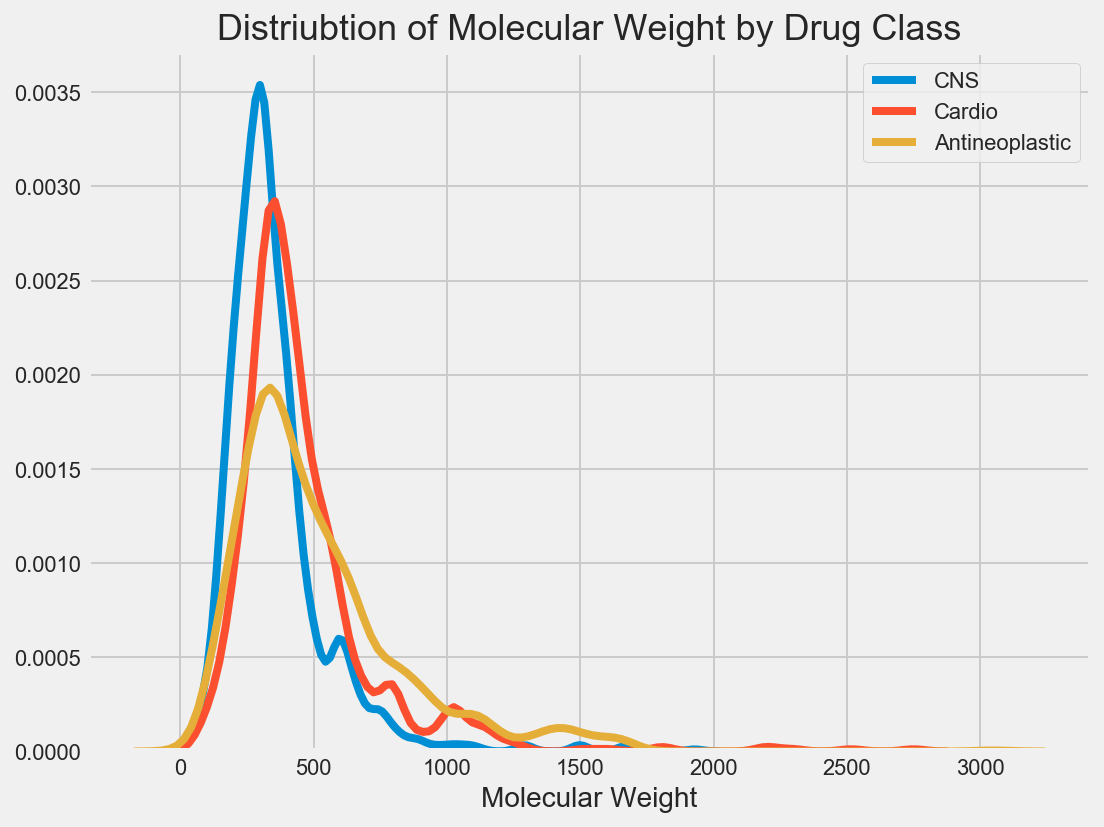

In [235]:
# Plot distribution of molecular weights by drug class
plt.figure(figsize = (8, 6))
sns.kdeplot(df.loc[df["drug_class"] == "cns"]["molecularweight"], label = "CNS")
sns.kdeplot(df.loc[df["drug_class"] == "cardio"]["molecularweight"], label = "Cardio")
sns.kdeplot(df.loc[df["drug_class"] == "antineoplastic"]["molecularweight"], label = "Antineoplastic")
plt.title("Distriubtion of Molecular Weight by Drug Class", fontsize = 18)
plt.xlabel("Molecular Weight", fontsize = 14)
plt.savefig("../plots/molecular_weights.png", dpi = 150);

__This plot shows me:__

There is a variance in molecular weights by drug class. It looks like antineoplastic drugs have the lowest molecular weights.

In [150]:
df.groupby("drug_class")["hbondacceptorcount"].describe()

,count,mean,std,min,25%,50%,75%,max
drug_class,,,,,,,,
antineoplastic,1174.0,9.045997,6.863020,0.0,4.0,7.0,11.0,48.0
cardio,787.0,7.204574,5.615553,0.0,4.0,6.0,8.5,56.0
cns,1141.0,4.649430,3.547148,0.0,2.0,4.0,6.0,52.0


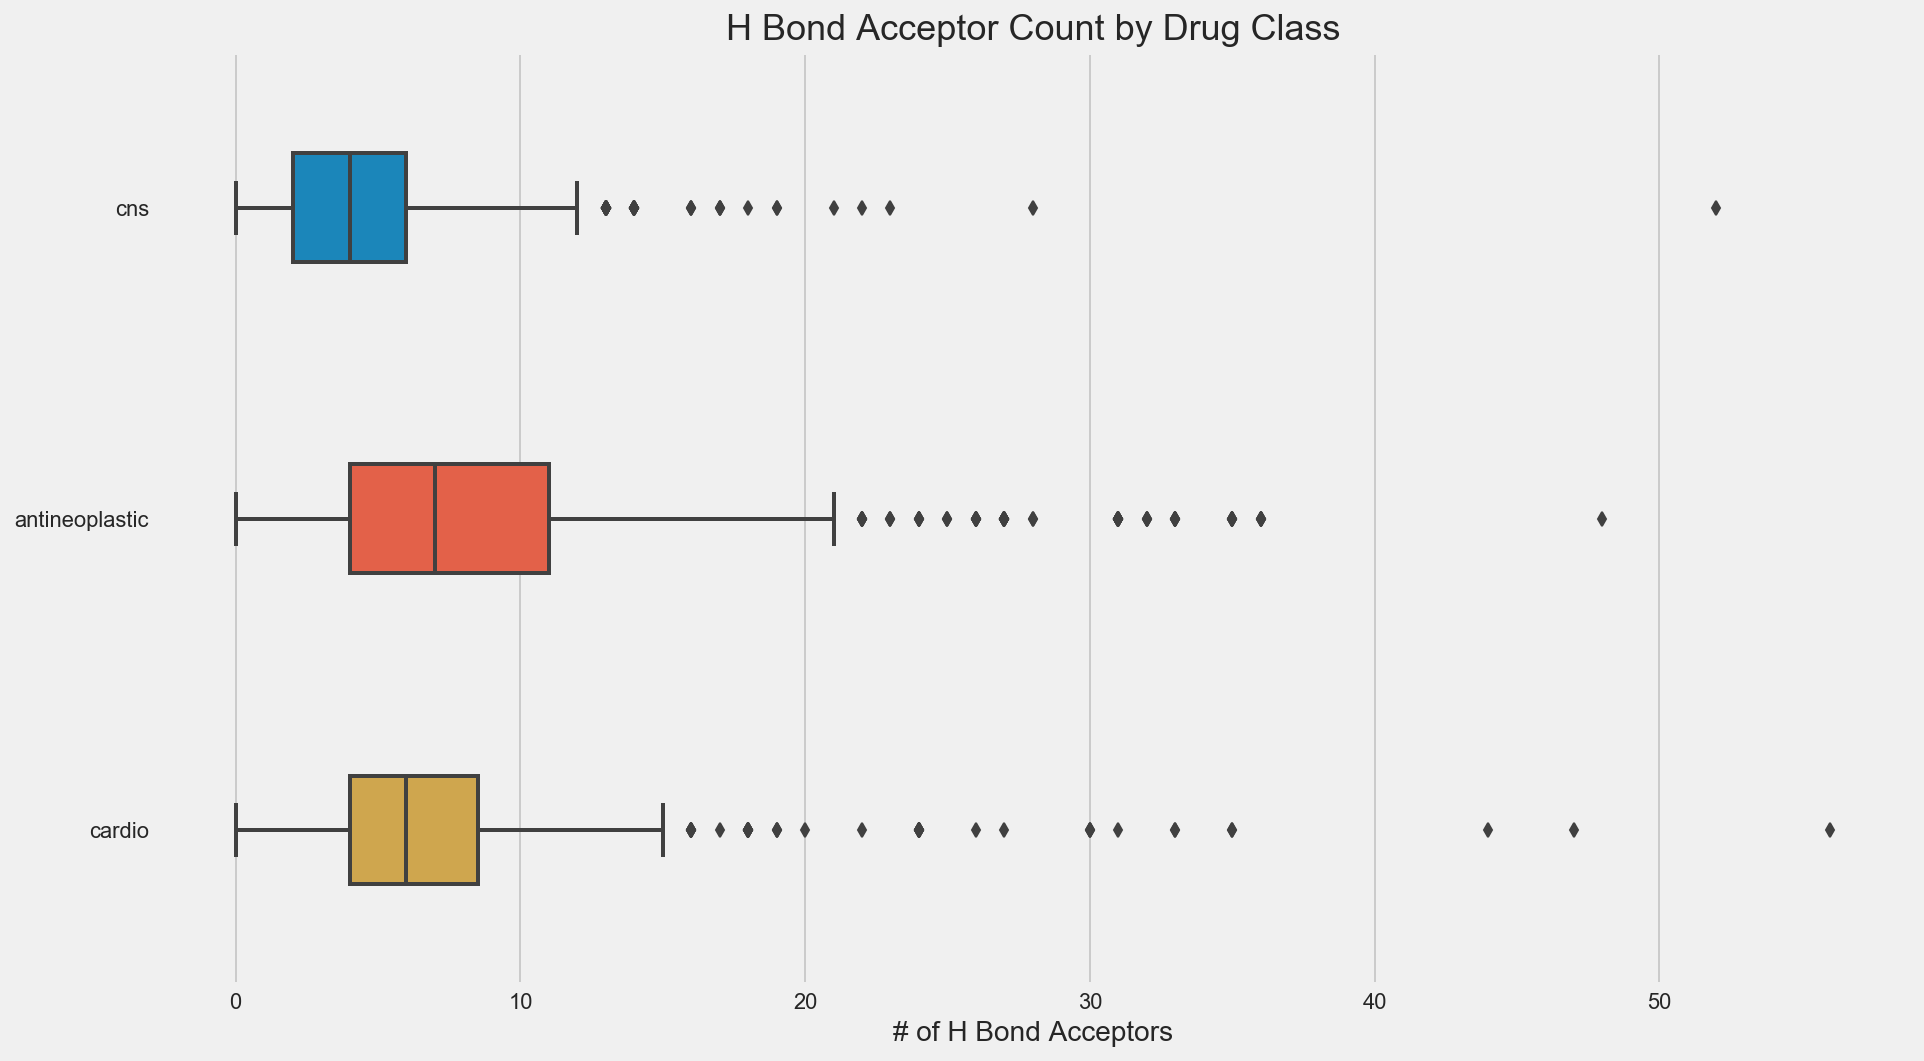

In [243]:
plt.figure(figsize = (14, 8))

sns.boxplot(x="hbondacceptorcount", y="drug_class",
            data=df, orient = "h", linewidth= 2 , width = 0.35)

plt.title("H Bond Acceptor Count by Drug Class", fontsize = 18)
plt.xlabel("# of H Bond Acceptors", fontsize = 14)
plt.ylabel("")
plt.savefig("../plots/hbond_acceptors.png", dpi = 150);

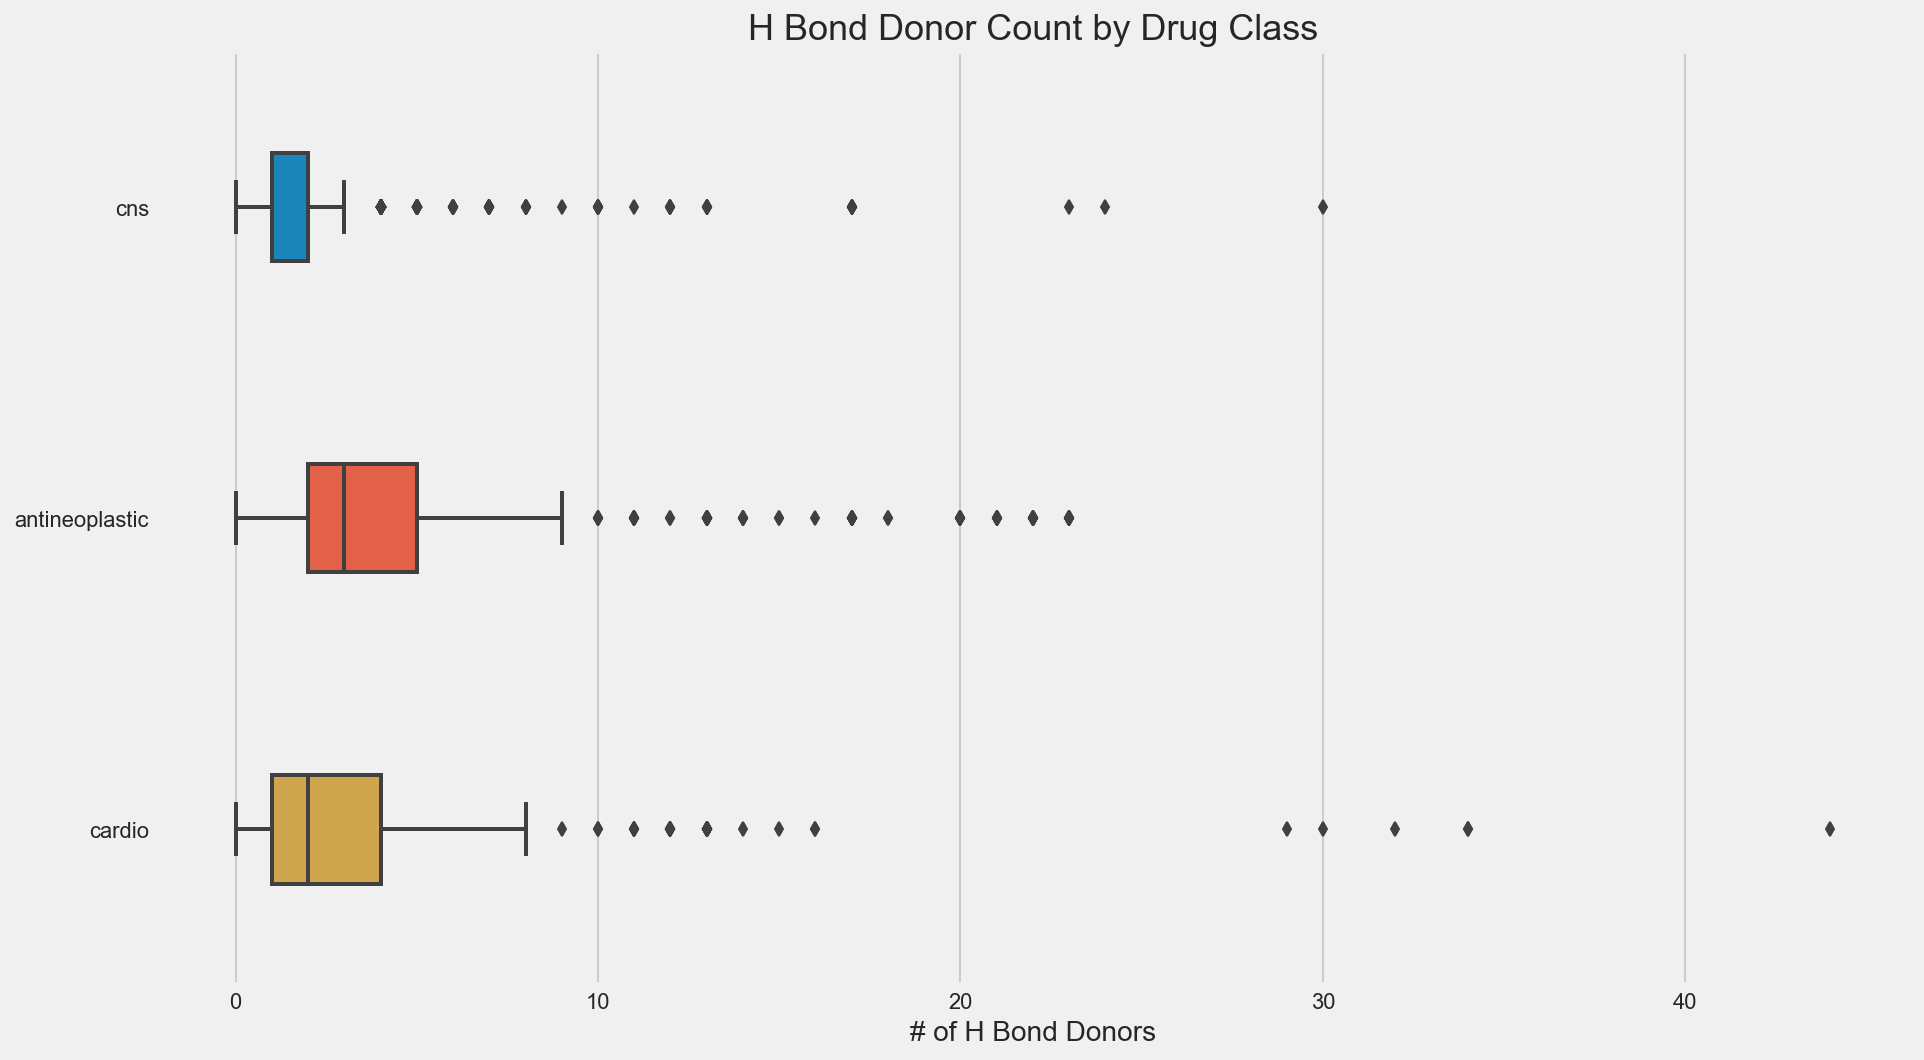

In [242]:
# Draw a nested boxplot to show bills by day and time
plt.figure(figsize = (14, 8))

sns.boxplot(x="hbonddonorcount", y="drug_class",
            data=df, orient = "h",  linewidth= 2 , width = 0.35)
plt.title("H Bond Donor Count by Drug Class", fontsize = 18)
plt.xlabel("# of H Bond Donors", fontsize = 14)
plt.ylabel("")
plt.savefig("../plots/hbond_donors.png", dpi = 150);